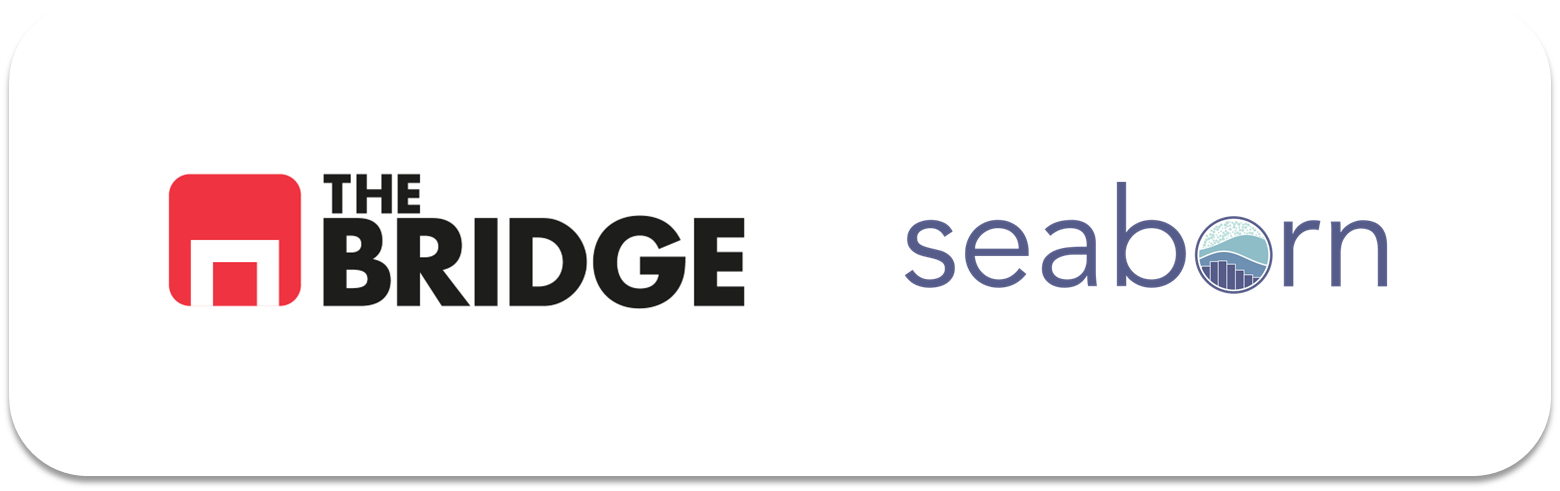

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
try:
    df_cities = pd.read_csv("data/california_cities.csv")
except FileNotFoundError:
    print("Error: Asegúrate de que el archivo 'california_cities.csv' está en la ruta 'data/'")
    df_cities = None

if df_cities is not None:
    print(df_cities.head())
    df_cities.info()

    df_cities_cleaned = df_cities.dropna()

    print("\nInformación del DataFrame después de la limpieza:")
    df_cities_cleaned.info()

   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_p

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [6]:

def scatter_plot_manual(
    df: pd.DataFrame,
    x_col: str, 
    y_col: str,
    group_col: str = None, 
    s_param: Union[float, str] = 50,
    scale_factor: float = 1/10000, 
    draw_legend: bool = True
):
 
    # 1. Preparación de los datos de tamaño
    s_values = s_param
    
    if isinstance(s_param, str) and s_param in df.columns:
        s_values = df[s_param] * scale_factor
        
    # 2. Inicialización de la figura
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 3. Dibujo de los puntos (Diferenciación clave: con o sin agrupamiento)
    legend_handles = []
    
    if group_col and group_col in df.columns:
        unique_groups = df[group_col].unique()
        cmap = plt.cm.get_cmap('viridis', len(unique_groups))
        
        for i, group in enumerate(unique_groups):
            subset = df[df[group_col] == group]
            

            color = cmap(i) 
            
            current_s = s_values if isinstance(s_values, (int, float)) else s_values[subset.index]


            scatter = ax.scatter(
                subset[x_col],
                subset[y_col],
                s=current_s,
                color=color,
                alpha=0.6,
                label=group 
            )
            if len(legend_handles) < 1:
                legend_handles.append(scatter)


    else:

        scatter = ax.scatter(
            df[x_col],
            df[y_col],
            s=s_values,
            color='skyblue',
            alpha=0.6
        )
        legend_handles.append(scatter)

    # 4. Personalización y Leyendas (EXTRA)

    if draw_legend and group_col and group_col in df.columns:
        ax.legend(title=group_col, loc='upper right')


    # 5. Títulos
    ax.set_title(f'Diagrama de Dispersión: {y_col} vs {x_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()



### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

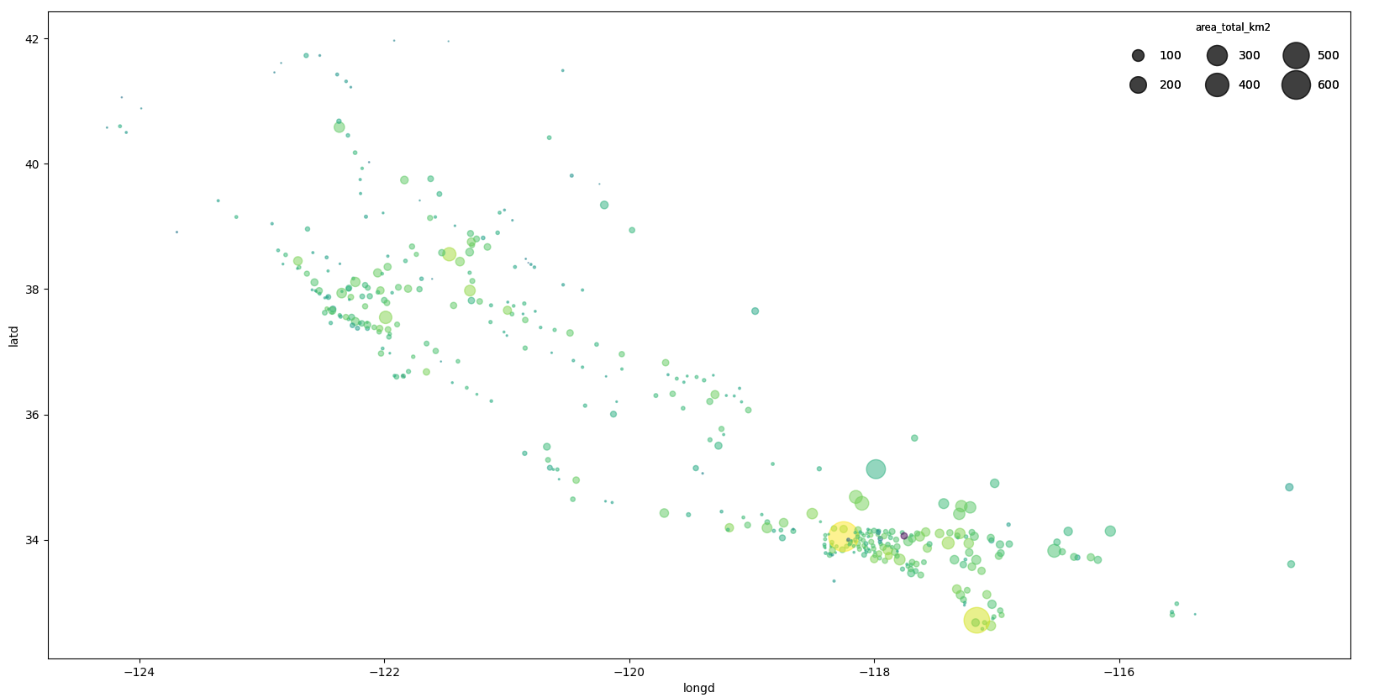

In [ ]:
def scatter_plot_plus(
    df: pd.DataFrame,
    col_num_1: str,
    col_num_2: str,
    col_cat: str = None,
    size_param: Union[float, str] = 50,
    scale: float = 1/10000,
    show_legend: bool = True
):
    plot_kwargs = {
        'x': col_num_1,
        'y': col_num_2,
        'data': df,
        'alpha': 0.6,
        'legend': show_legend
    }

    # A) Color
    if col_cat is not None and col_cat in df.columns:
        plot_kwargs['hue'] = col_cat
        plot_kwargs['palette'] = 'viridis'

    # B) Tamaño
    if isinstance(size_param, str) and size_param in df.columns:
        temp_size_col = f'{size_param}_scaled'
        df[temp_size_col] = df[size_param] * scale

        plot_kwargs['size'] = temp_size_col
        plot_kwargs['sizes'] = (5, 500)
    else:
        plot_kwargs['size'] = size_param
        plot_kwargs['sizes'] = None

    plt.figure(figsize=(10, 6))
    
    sns.scatterplot(**plot_kwargs)

    plt.title(f'Diagrama de Dispersión: {col_num_2} vs {col_num_1}')
    plt.xlabel(col_num_1)
    plt.ylabel(col_num_2)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()

    # Eliminamos la columna temporal 
    if isinstance(size_param, str) and size_param in df.columns:
        df.drop(columns=[temp_size_col], inplace=True, errors='ignore')

C:\Users\ivanm\AppData\Local\Temp\ipykernel_21556\880097469.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[temp_size_col] = df[size_param] * scale


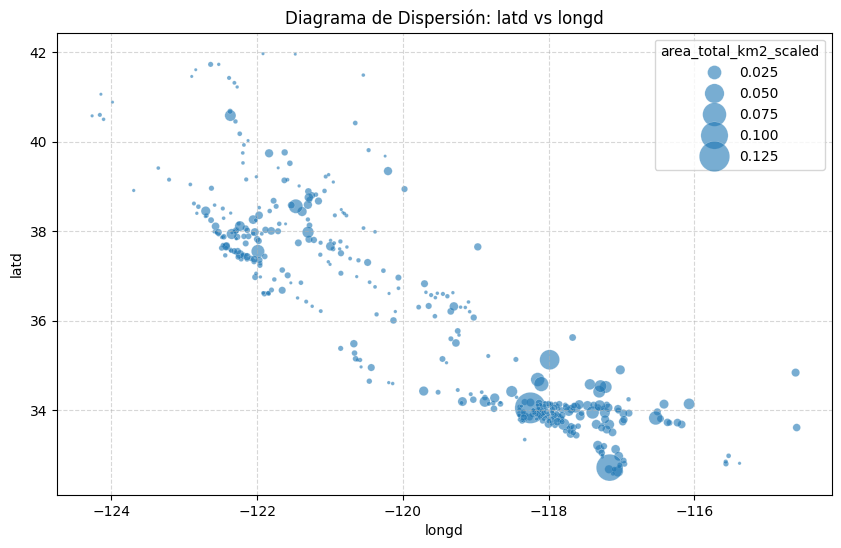

C:\Users\ivanm\AppData\Local\Temp\ipykernel_21556\880097469.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[temp_size_col], inplace=True, errors='ignore')


In [9]:
scatter_plot_plus(
    df=df_cities_cleaned,
    col_num_1='longd',
    col_num_2='latd',
    col_cat='log_poblacion',
    size_param='area_total_km2',
    scale=1/10000,
    show_legend=True
)

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)

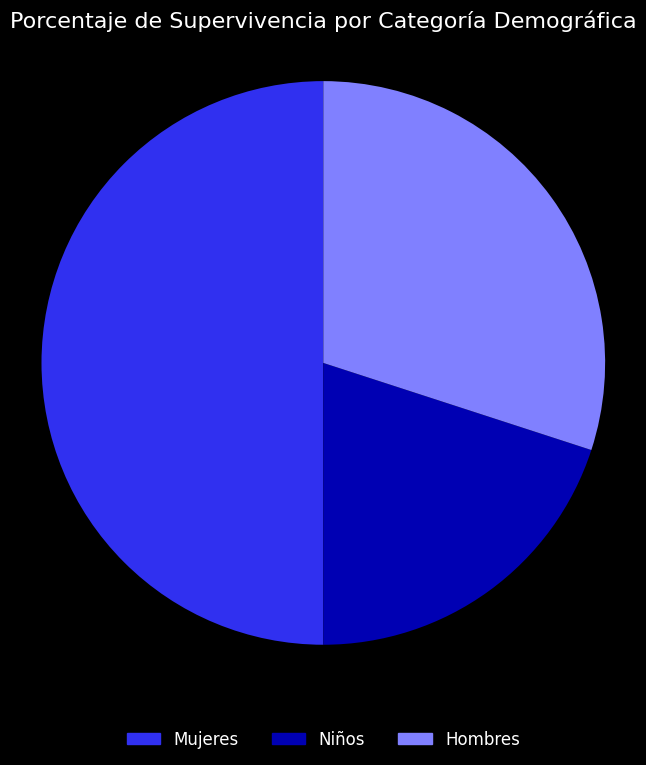

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

survival_data = [
    50,  # Mujeres
    20,  # Niños
    30   # Hombres
]
categories = ['Mujeres', 'Niños', 'Hombres']

colors_pie = ['#3030F0', '#0000B3', '#8080FF']

plt.figure(figsize=(8, 8))
plt.style.use('dark_background')

# Crear el gráfico de pastel
wedges, texts = plt.pie(
    survival_data,
    colors=colors_pie,
    startangle=90,
)

# Título y Leyenda
plt.title(
    'Porcentaje de Supervivencia por Categoría Demográfica',
    fontsize=16,
    color='white',
    pad=20
)

# Crear la leyenda 
legend_handles = [mpl.patches.Patch(color=c, label=l) for c, l in zip(colors_pie, categories)]
plt.legend(
    legend_handles,
    categories,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False,
    fontsize='large',
    labelcolor='white'
)

# Asegurar que el pastel sea un círculo
plt.axis('equal')

plt.show()

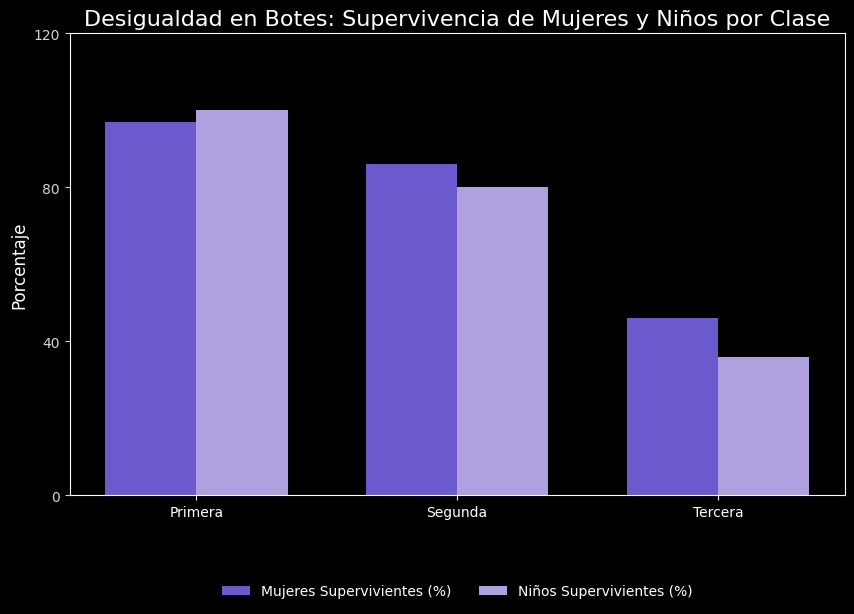

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data_survival = {
    'Mujeres Supervivientes (%)': [97, 86, 46], 
    'Niños Supervivientes (%)': [100, 80, 36]  
}
clases = ['Primera', 'Segunda', 'Tercera']
df_survival = pd.DataFrame(data_survival, index=clases)

# Colores
colors_bar = {
    'Mujeres Supervivientes (%)': '#6A5ACD', 
    'Niños Supervivientes (%)': '#B0A0E0'   
}


plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(clases))

# Posición para las barras de Mujeres
bar1_positions = [i - bar_width/2 for i in index]
# Posición para las barras de Niños
bar2_positions = [i + bar_width/2 for i in index]

# Plot de las barras de Mujeres
ax.bar(
    bar1_positions,
    df_survival['Mujeres Supervivientes (%)'],
    bar_width,
    label='Mujeres Supervivientes (%)',
    color=colors_bar['Mujeres Supervivientes (%)']
)

# Plot de las barras de Niños
ax.bar(
    bar2_positions,
    df_survival['Niños Supervivientes (%)'],
    bar_width,
    label='Niños Supervivientes (%)',
    color=colors_bar['Niños Supervivientes (%)']
)

ax.set_title('Desigualdad en Botes: Supervivencia de Mujeres y Niños por Clase', fontsize=16, color='white')
ax.set_ylabel('Porcentaje', fontsize=12, color='white')

ax.set_xticks(index)
ax.set_xticklabels(clases, color='white')
ax.set_ylim(0, 120)
ax.set_yticks(range(0, 121, 40))
ax.tick_params(axis='y', colors='lightgray')

# Leyenda 
ax.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=2,
    frameon=False,
    fontsize='medium',
    labelcolor='white'
)


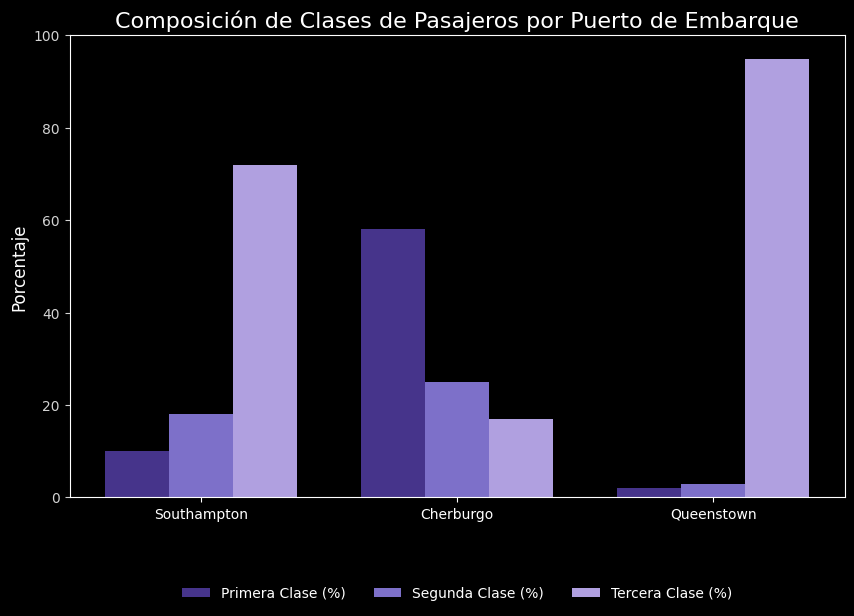

In [ ]:

data_port = {
    'Primera Clase (%)': [10, 58, 2],
    'Segunda Clase (%)': [18, 25, 3],
    'Tercera Clase (%)': [72, 17, 95]
}

puertos = ['Southampton', 'Cherburgo', 'Queenstown']
df_port = pd.DataFrame(data_port, index=puertos)


colors_grouped = {
    'Primera Clase (%)': '#46348B',
    'Segunda Clase (%)': '#7D70C9',  
    'Tercera Clase (%)': '#B0A0E0'   
}


plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))

# Variables para posicionamiento
bar_width = 0.25 
index = np.arange(len(puertos)) # 

bar1_positions = index - bar_width
bar2_positions = index
bar3_positions = index + bar_width

# Plot de la Primera Clase
ax.bar(
    bar1_positions,
    df_port['Primera Clase (%)'],
    bar_width,
    label='Primera Clase (%)',
    color=colors_grouped['Primera Clase (%)']
)

# Plot de la Segunda Clase
ax.bar(
    bar2_positions,
    df_port['Segunda Clase (%)'],
    bar_width,
    label='Segunda Clase (%)',
    color=colors_grouped['Segunda Clase (%)']
)

# Plot de la Tercera Clase
ax.bar(
    bar3_positions,
    df_port['Tercera Clase (%)'],
    bar_width,
    label='Tercera Clase (%)',
    color=colors_grouped['Tercera Clase (%)']
)


ax.set_title('Composición de Clases de Pasajeros por Puerto de Embarque', fontsize=16, color='white')
ax.set_ylabel('Porcentaje', fontsize=12, color='white')

ax.set_xticks(index)
ax.set_xticklabels(puertos, color='white')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 20))
ax.tick_params(axis='y', colors='lightgray')

# Leyenda
ax.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=3,
    frameon=False,
    fontsize='medium',
    labelcolor='white'
)


C:\Users\ivanm\AppData\Local\Temp\ipykernel_21556\3995647209.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(clases, color='white')


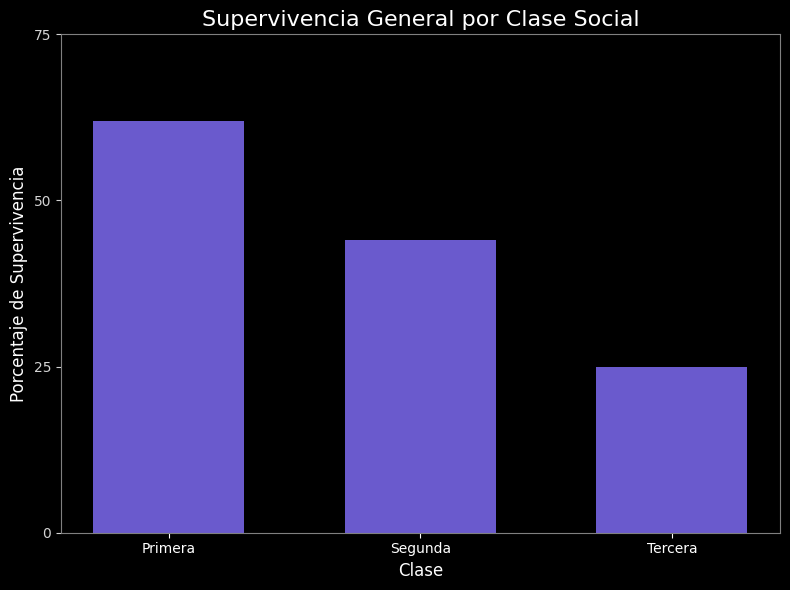

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data_class_survival = {
    'Supervivencia (%)': [62, 44, 25]  
}

clases = ['Primera', 'Segunda', 'Tercera']
df_class = pd.DataFrame(data_class_survival, index=clases)

# Colores 
color_bar = '#6A5ACD' 


plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(
    df_class.index,
    df_class['Supervivencia (%)'],
    color=color_bar,
    width=0.6
)


ax.set_title('Supervivencia General por Clase Social', fontsize=16, color='white')
ax.set_ylabel('Porcentaje de Supervivencia', fontsize=12, color='white')
ax.set_xlabel('Clase', fontsize=12, color='white')

ax.set_xticklabels(clases, color='white')

ax.set_ylim(0, 75)
ax.set_yticks(range(0, 76, 25))
ax.tick_params(axis='y', colors='lightgray')

# Eliminar bordes
for spine in ax.spines.values():
    spine.set_edgecolor('gray')

plt.tight_layout()
plt.show()